# Assignment 01 Happiness
by YaoMin(Allen) Zhang

## Section 01
In this section, we'll explore the dataset. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_excel('DataForTable2.1WHR2023.xls')
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


### 1. How large is the dataset? What are the features (columns) and how are they represented?
The dataset has 2199 rows and 11 columns. 

The columns are 'Country name', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', and 'Negative affect'.

By running df.info(), we can see the data type of each column.  'Country name' is object, 'year' is int64, and the rest of the columns are float64.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


In [5]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590


In [6]:
df.shape

(2199, 11)

### Are there any interesting distributions in the (numeric) features? 

Firstly, let's take a look at the number of countries in each year. As we can see, the data starts from 2005 and ends at 2022. The number of countries in each year is different. From 2005 to 2011, the number increases gradually. From 2011 to 2019, the number of countries is relatively stable. From 2019 to 2022 which is the pandemic period, the number of countries decreases.

Then, I illustrated all numeric features' distributions by using histograms from 2011 to 2019, because these years have the most countries' data.

 As the distribution of "Life Ladder", the majority of the data points are concentrated around the middle of the scale, between 4 to 6.  This could suggest that most countries have moderate 'Life Ladder' scores with fewer countries experiencing very high or very low scores.

Another interesting distribution is "Social support". It is left-skewed with a high peak towards the higher end of the scale, closer to 1. This suggests that a large number of countries have high social support scores, with fewer countries having lower scores. 


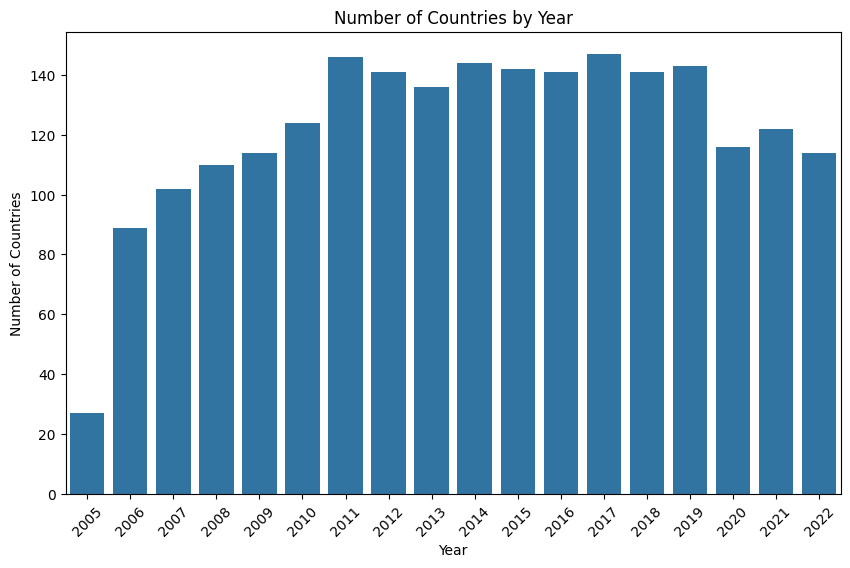

In [10]:
# Illustrating the distribution of records by year
plt.figure(figsize=(10, 6))  
sns.countplot(x='year', data=df)

plt.title('Number of Countries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)  

plt.show()

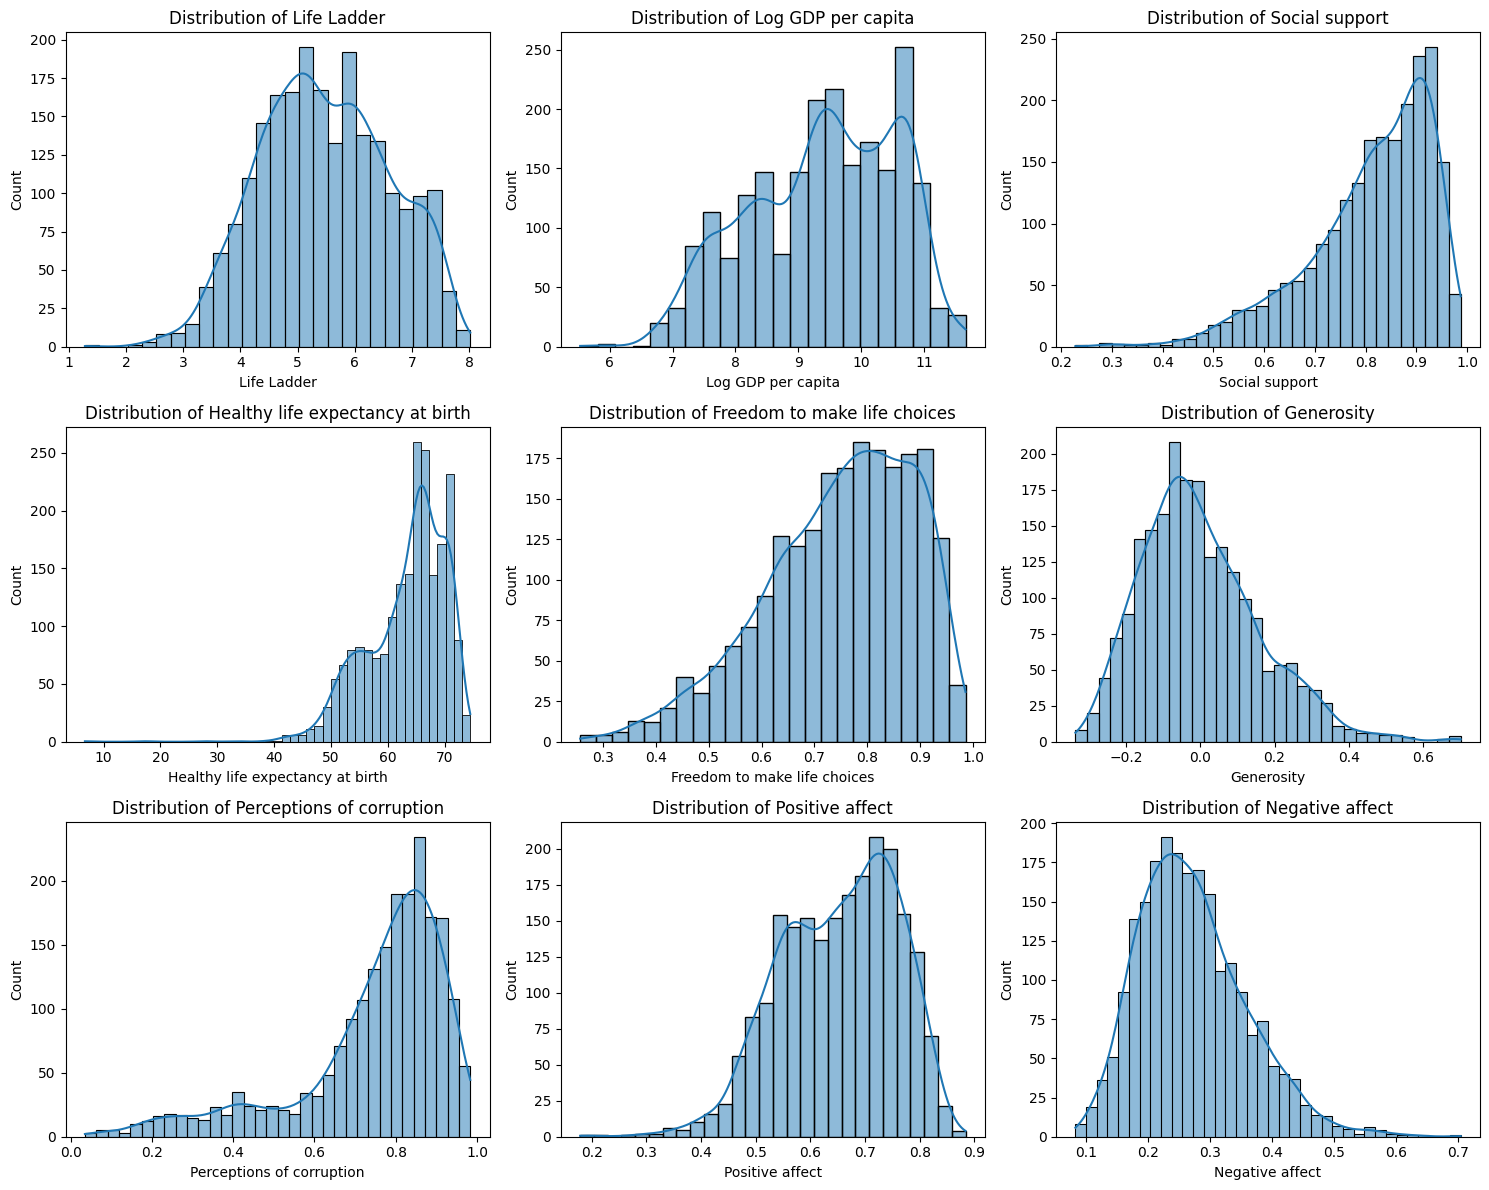

In [11]:
df_filtered = df[df['year'].between(2011, 2019)]
numeric_columns = df_filtered.select_dtypes(include=['float64']).columns
n_cols = 3  
n_rows = int(np.ceil(len(numeric_columns) / n_cols))
plt.figure(figsize=(n_cols * 5, n_rows * 4))  
for i, column in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

### Are there any interesting correlations in the data? 
Again, I want to focus on the years from 2011 to 2019. I used a heatmap to illustrate the correlation between the features.

There are several variables that show a strong positive correlation with 'Life Ladder'. 'Life Ladder' is a measure of happiness. [ref](https://worldhappiness.report/data/). The variables that show a strong positive correlation with 'Life Ladder' are 'Log GDP per capita', 'Social support', and 'Healthy life expectancy at birth'. This suggests that countries with higher GDP per capita, social support, and healthy life expectancy at birth tend to have higher happiness scores.

The 'Perceptions of corruption' row has negative correlations with 'Life Ladder'. This indicates that higher perceptions of corruption are associated with lower happiness scores.

 'Generosity' does not seem to have strong correlations with most other variables. This suggests that generosity is not significantly linked to happiness scores.

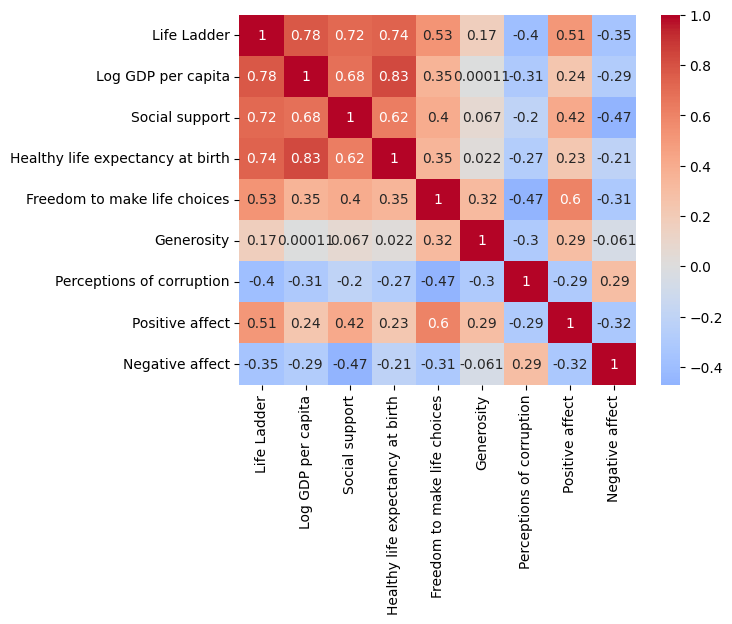

In [12]:
df_filtered = df[df['year'].between(2011, 2019)]
numeric_columns = df_filtered.select_dtypes(include=['float64']).columns
correlation_matrix = df_filtered[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

### Can you identify any limitations, missing values or distortions of the data? What would you like to see in this dataset?

As showed above, the country number increases from 2005 to 2011, and then stays relatively stable from 2011 to 2019. However, the number of countries decreases from 2019 to 2022. The report may not include all countries in the world.

By using df.isna().sum(), we can see that there are some missing values in the dataset, but not many. Overall, the dataset is quite clean.

The report dashboard shows region information. It would be interesting to see the region information in the dataset. Furthermore, some other features like population, education level could be enriched to the dataset.
![image](HappinessReport.png)


In [15]:
df.isna().sum() 

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
Positive affect                      24
Negative affect                      16
dtype: int64

### What is your evaluation of the quality of the data? 

In summary, the dataset is quite clean. There are some missing values, but not many. The dataset is quite comprehensive, with 2199 rows and 11 columns. The data is well-structured and easy to understand. I would like to see more features like region information, population, and education level in the dataset. 

## Section 02 What is the happiest country in 2022? In 2013? Of all time? What is the least happy country in 2022, 2013 and of all time?

To answer maximum and minimum happiness countries, We can either use idxmax() and idxmin() or sort the dataframe by 'Life Ladder' and then select the first and last row.

Let's also use the bar plot to visualize the happy scores of countries in 2022 and 2013. One picture is worth a thousand words.

In [24]:
happiest_country_2022 = df[df['year'] == 2022]['Life Ladder'].idxmax()
print("Happiest country in 2022:", df.loc[happiest_country_2022, 'Country name'])	

happiest_country_2013 = df[df['year'] == 2013]['Life Ladder'].idxmax()
print("Happiest country in 2013:", df.loc[happiest_country_2013, 'Country name'])

happiest_country_all_time = df.groupby('Country name')['Life Ladder'].mean().sort_values(ascending=False).index[0]
print("Happiest country of all time:", happiest_country_all_time)


Happiest country in 2022: Finland
Happiest country in 2013: Canada
Happiest country of all time: Denmark


In [17]:
least_happy_country_2022= df[df['year'] == 2022].sort_values('Life Ladder', ascending=True).iloc[0]
print("Least happy country in 2022:", least_happy_country_2022['Country name'])

least_happy_country_2013 = df[df['year'] == 2013].sort_values('Life Ladder', ascending=True).iloc[0]
print("Least happy country in 2013:", least_happy_country_2013['Country name'])

least_happy_country_all_time = df.groupby('Country name')['Life Ladder'].mean().sort_values(ascending=True).index[0]
print("Least happy country of all time:", least_happy_country_all_time)

Least happy country in 2022: Afghanistan
Least happy country in 2013: Syria
Least happy country of all time: Afghanistan


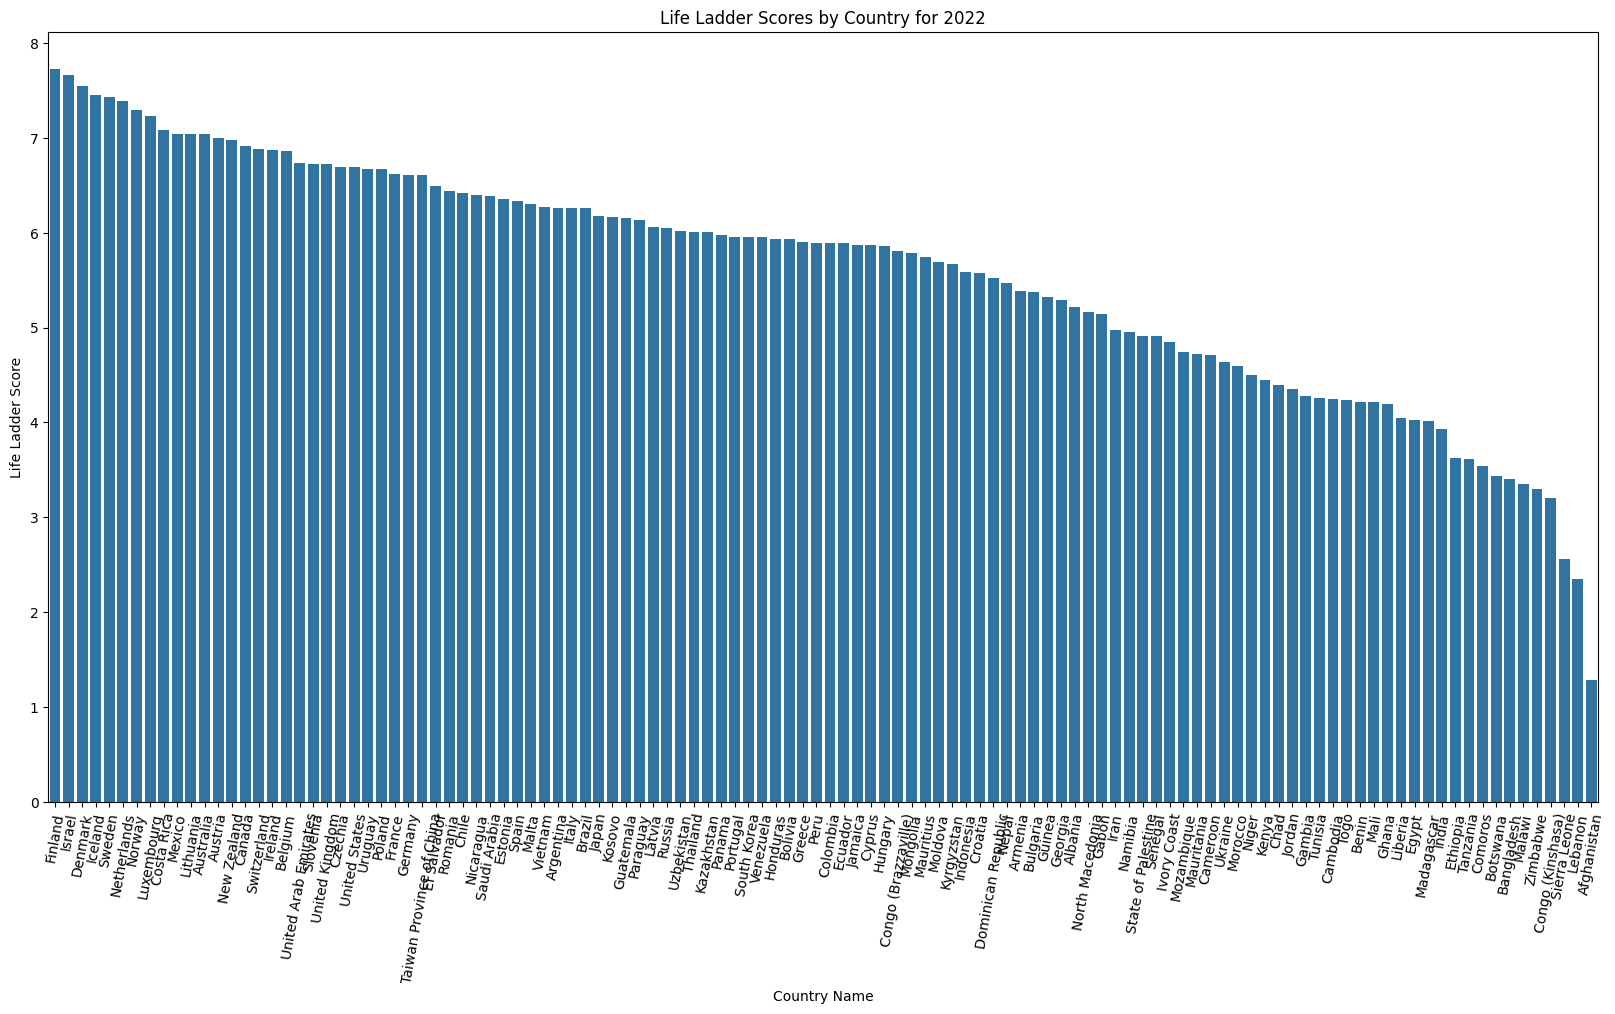

In [18]:
df_2022 = df[df['year'] == 2022]

df_2022_sorted = df_2022.sort_values('Life Ladder', ascending=False)

plt.figure(figsize=(20,10)) 
sns.barplot(x='Country name', y='Life Ladder', data=df_2022_sorted)

plt.xticks(rotation=80) 

plt.title('Life Ladder Scores by Country for 2022')
plt.xlabel('Country Name')
plt.ylabel('Life Ladder Score')
plt.show()

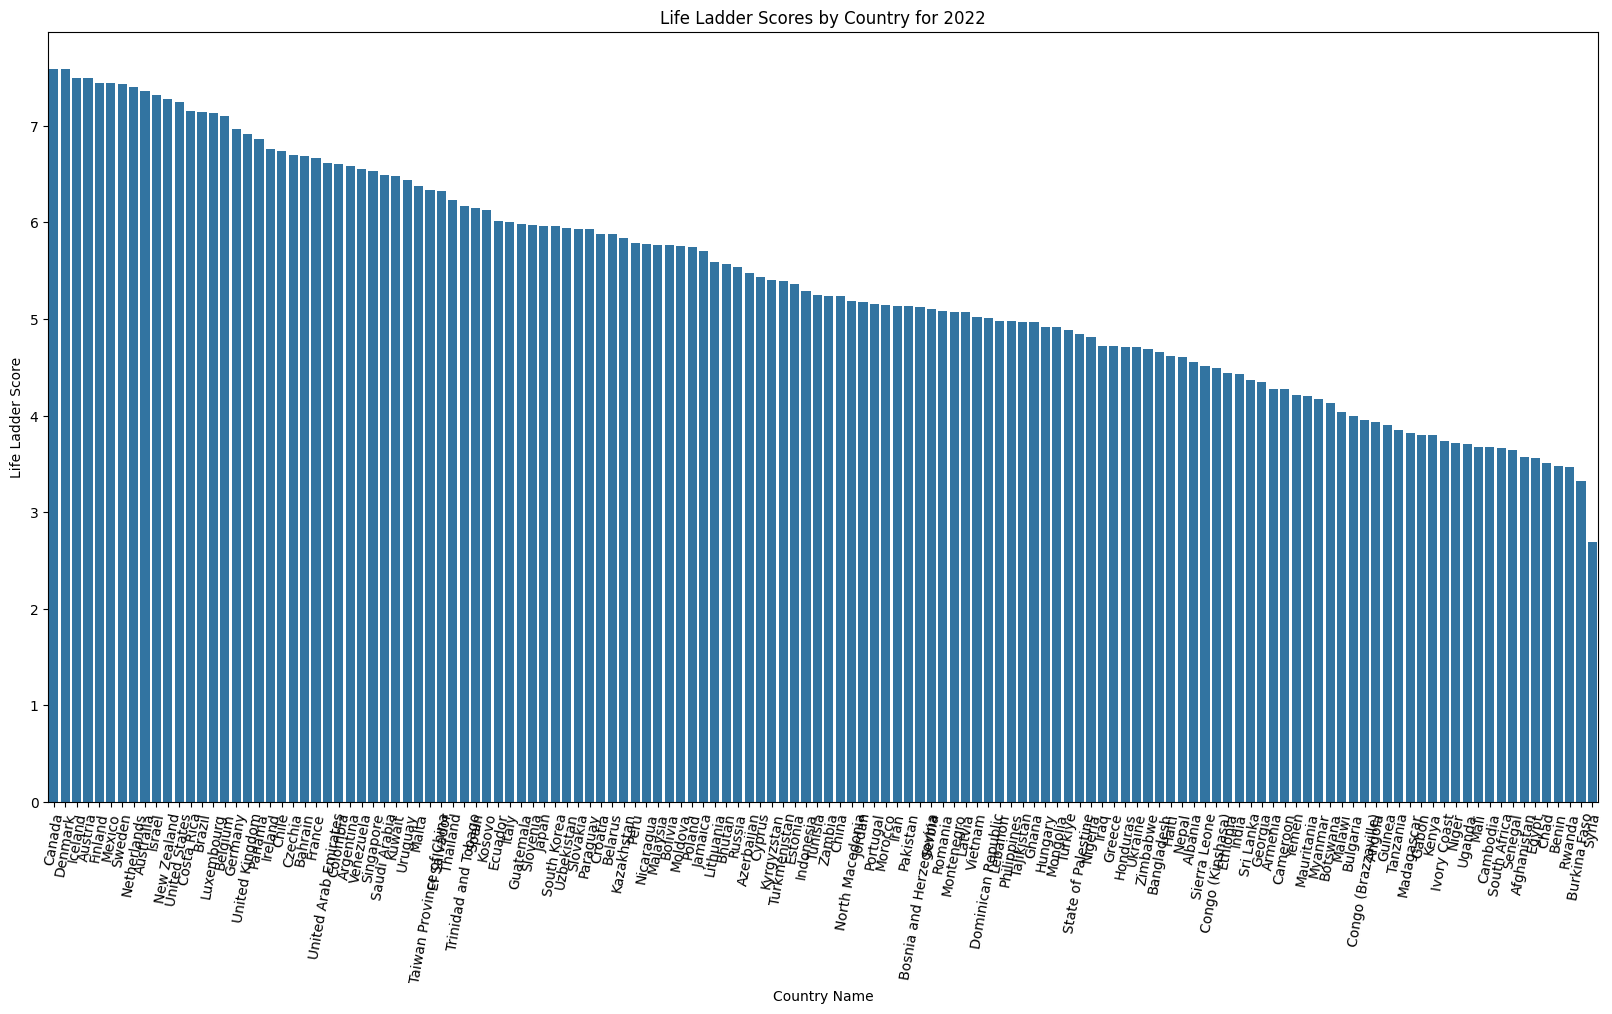

In [19]:
df_2022 = df[df['year'] == 2013]

df_2022_sorted = df_2022.sort_values('Life Ladder', ascending=False)

plt.figure(figsize=(20,10)) 
sns.barplot(x='Country name', y='Life Ladder', data=df_2022_sorted)

plt.xticks(rotation=80) 

plt.title('Life Ladder Scores by Country for 2022')
plt.xlabel('Country Name')
plt.ylabel('Life Ladder Score')
plt.show()

## Section 03: Of the countries in this dataset, which country had the largest increase in happiness from its start of participation to 2022? Which had the largest decrease in happiness?

I modulate largest increase question as following:
1. Find the first year of participation for a country.
2. Find the last year of participation for the country(supposed to be 2022, but if not, we can use the latest year).
3. Calculate the difference in happiness score between the first and last year of participation.

Accordingly, I modulate largest decrease question in a similar way.
   


In [26]:
countries = df['Country name'].unique()
largest_increase = 0
largest_increase_country = ''
largest_decrease = 0
largest_decrease_country = ''
for country in countries:
	first_year = df[df['Country name'] == country]['year'].min()
	last_year = df[df['Country name'] == country]['year'].max()
	first_year_score = df[(df['Country name'] == country) & (df['year'] == first_year)]['Life Ladder'].values[0]
	last_year_score = df[(df['Country name'] == country) & (df['year'] == last_year)]['Life Ladder'].values[0]
	increase = last_year_score - first_year_score
	decrease = first_year_score - last_year_score
	if increase > largest_increase:
		largest_increase = increase
		largest_increase_country = country
	if decrease > largest_decrease:
		largest_decrease = decrease
		largest_decrease_country = country
print("Country with the largest increase in Life Ladder score:", largest_increase_country, "with an increase of", largest_increase)
print("Country with the largest decrease in Life Ladder score:", largest_decrease_country, "with a decrease of", largest_decrease)

Country with the largest increase in Life Ladder score: Congo (Brazzaville) with an increase of 1.9851264953613281
Country with the largest decrease in Life Ladder score: Lebanon with a decrease of 3.138817548751831


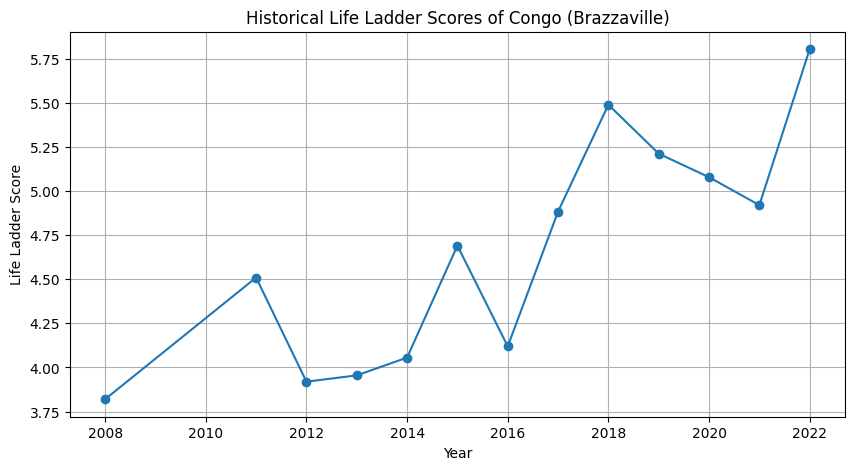

In [27]:
country_name = 'Congo (Brazzaville)'
country_data = df[df['Country name'] == country_name]

country_data_sorted = country_data.sort_values('year')
plt.figure(figsize=(10, 5))
plt.plot(country_data_sorted['year'], country_data_sorted['Life Ladder'], marker='o')

plt.title(f'Historical Life Ladder Scores of {country_name}')
plt.xlabel('Year')
plt.ylabel('Life Ladder Score')
plt.grid(True)
plt.show()


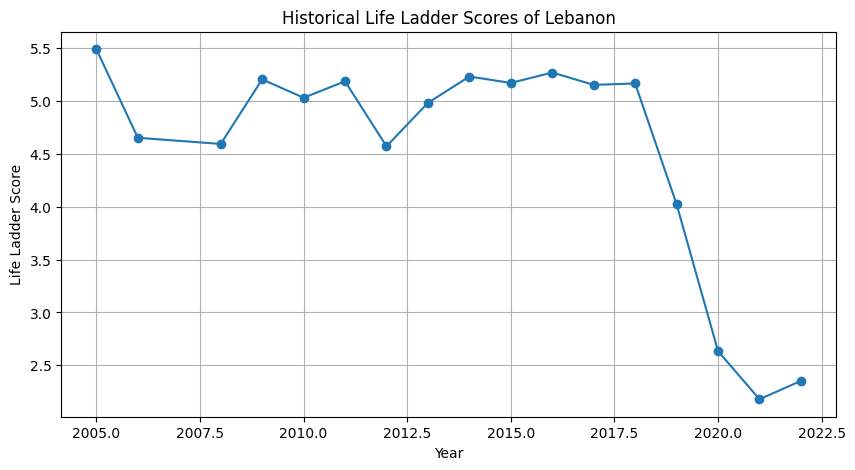

In [28]:
country_name = 'Lebanon'
country_data = df[df['Country name'] == country_name]

country_data_sorted = country_data.sort_values('year')
plt.figure(figsize=(10, 5))
plt.plot(country_data_sorted['year'], country_data_sorted['Life Ladder'], marker='o')

plt.title(f'Historical Life Ladder Scores of {country_name}')
plt.xlabel('Year')
plt.ylabel('Life Ladder Score')
plt.grid(True)
plt.show()
